# 이미지 데이터 특징 파악하기
## Step 1. 라이브러리 로딩

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

## Step 2. 데이터 로딩

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [8]:
# 데이터 확인
# X_train[0][0][0]
# 인덱서 7에 있는 이미지 한 장
X_train[7]
# 인덱스 7에 있는 이미지의 첫번쨰선
X_train[7][5]

array([  0,   0,   3,   0,   0, 255, 235, 239, 223, 234, 238, 236, 237,
       236, 235, 235, 235, 235, 236, 235, 234, 230, 231, 255,  24,   0,
         4,   0], dtype=uint8)

# 이미지 확인
- 28 x 28 이미지
- 한 개의 픽셀은 0~255로 표현이 됨
- 0: 검정, 255: 흰색

In [11]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

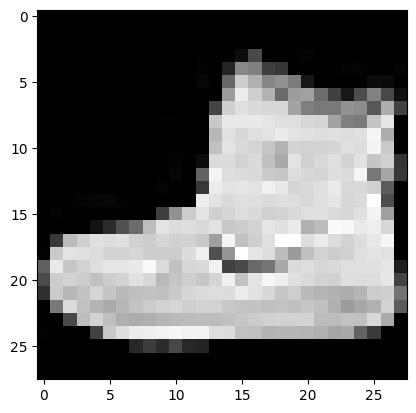

In [10]:
# X_train 데이터의 0번째 이미지
plt.imshow(X_train[0], cmap='gray')
plt.show()

## Labels
- DNN에서는 Feature를 2D로 넣어야 함

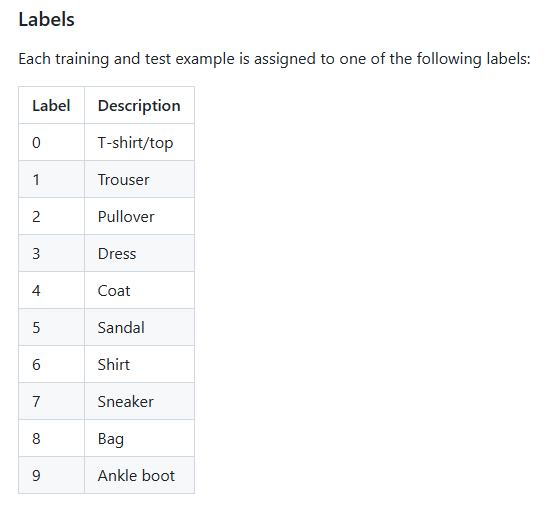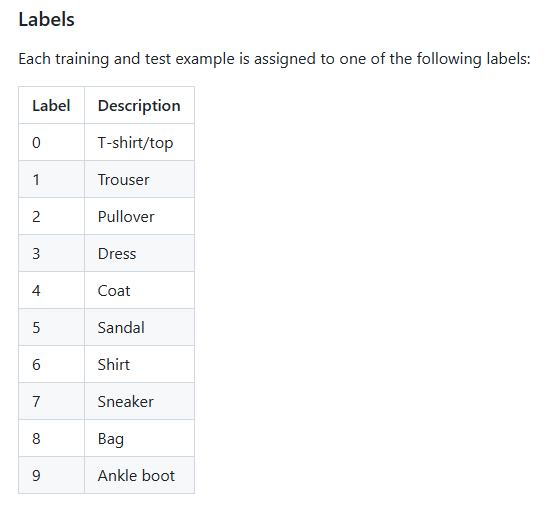

In [14]:
y_train[0]

np.uint8(9)

In [15]:
y_train[1]

np.uint8(0)

# 이미지 데이터 전처리

In [18]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [19]:
X_train.max()

np.uint8(255)

In [20]:
X_train.min()

np.uint8(0)

In [25]:
# 정규화 0~1 사이값으로 정규화, 실수로 변환
X_train = X_train/255.0

In [26]:
X_train.max()

np.float64(1.0)

In [27]:
X_train.min()

np.float64(0.0)

In [28]:
# X_test 데이터 정규화
X_test = X_test/255.0

## Reshaping of the dataset
- DNN에서는 Feature를 2D로 넣어야 함

In [31]:
28*28

784

In [35]:
X_train = X_train.reshape(-1, 28*28)
X_train.shape

(60000, 784)

In [34]:
X_test = X_test.reshape(-1, 28*28)
X_test.shape

(10000, 784)

## Step 4. DNN으로 모델 만들기

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

In [43]:
def build_model(input_dim):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(128, 'relu'))
    model.add(Dropout(0.2))    # 0.2 정도 연결을 끊음, 오버피팅을 감소시킥 위해서, 실험을 통해서 알게된 결과임
    model.add(Dense(64, 'relu'))
    model.add(Dropout(0.2))    # 0.2 정도 연결을 끊음, 오버피팅을 감소시킥 위해서, 실험을 통해서 알게된 결과임
    model.add(Dense(64, 'relu'))
    model.add(Dropout(0.2))    # 0.2 정도 연결을 끊음, 오버피팅을 감소시킥 위해서, 실험을 통해서 알게된 결과임
    model.add(Dense(10, 'softmax'))
    model.compile(optimizer=Adam(), # learning_rate=0.001
                  loss=SparseCategoricalCrossentropy(), 
                  metrics=[SparseCategoricalAccuracy()])
    return model

In [44]:
tf.__version__

'2.20.0'

### 모델학습

In [45]:
input_dim = 784
model = build_model(input_dim=input_dim)

In [46]:
# validation_data=(X_test, y_test) : 학습하면서 쪽지시험 데이터를 주는 것
history = model.fit(
    X_train, y_train, 
    epochs=100, 
    validation_split=0.2,
    verbose=0
)

## Step 5. 모델평가

In [47]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4053 - sparse_categorical_accuracy: 0.8900


[0.40525445342063904, 0.8899999856948853]

In [48]:
y_pred = model.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step


array([[3.48033878e-14, 3.94735819e-15, 1.21353329e-12, ...,
        7.05490311e-05, 1.90343698e-15, 9.99927163e-01],
       [5.15782332e-08, 3.64161335e-17, 9.98914003e-01, ...,
        9.20064356e-30, 6.43553678e-13, 4.56533527e-27],
       [3.39760442e-33, 1.00000000e+00, 1.72451565e-35, ...,
        0.00000000e+00, 3.69923687e-34, 0.00000000e+00],
       ...,
       [2.70730355e-10, 4.88559298e-18, 8.56273108e-11, ...,
        6.58945801e-23, 9.99999881e-01, 2.18041562e-20],
       [1.76884987e-19, 1.00000000e+00, 2.20137454e-22, ...,
        0.00000000e+00, 4.77904536e-20, 0.00000000e+00],
       [3.88217887e-13, 1.07966214e-16, 4.81921319e-19, ...,
        6.16429006e-08, 2.74666764e-13, 3.20931726e-10]],
      shape=(10000, 10), dtype=float32)

In [49]:
y_pred.shape

(10000, 10)

### 예측 결과 확인하기

In [50]:
X_test.shape

(10000, 784)

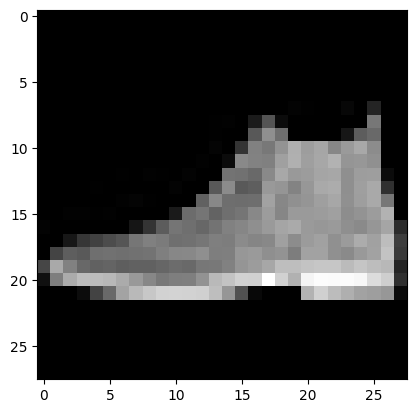

In [70]:
# X_test.reshape(-1, 28, 28) : X_test 데이터를 2D로 만든것을 3D로 변한
plt.imshow(X_test.reshape(-1, 28, 28)[0], cmap='gray')
plt.show()

In [52]:
# 실제값
y_test[0]

np.uint8(9)

In [54]:
# 예측결과 (가장 큰값의 인덱스)
y_pred[0].argmax()

np.int64(9)

In [55]:
# 실제값
y_test[1]

np.uint8(2)

In [56]:
# 예측결과 (가장 큰 값의 인덱스)
y_pred[2].argmax()

np.int64(1)

### Confusion Matrix

In [57]:
# 예측값 최종결과
y_pred_index = y_pred.argmax(axis=1)

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [59]:
cm = confusion_matrix(y_test, y_pred_index)

In [60]:
import seaborn as sns

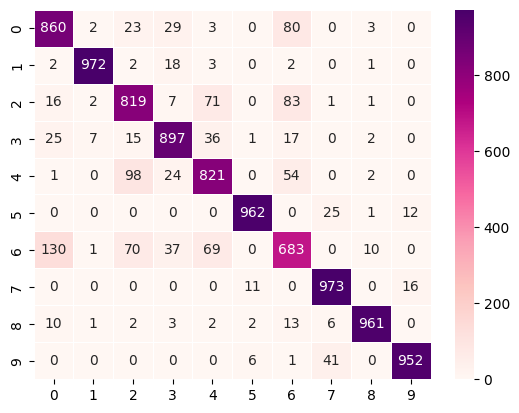

In [61]:
sns.heatmap(cm, annot=True, fmt='d', linewidths=0.5, cmap='RdPu')
# sb.heatmap(cm, annot=True, fmt='.1f', linewidths=0.5, cmap='RdPu')
plt.show()

In [62]:
accuracy_score(y_test, y_pred_index)

0.89

In [63]:
print(classification_report(y_test, y_pred_index))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.82      0.81      1000
           3       0.88      0.90      0.89      1000
           4       0.82      0.82      0.82      1000
           5       0.98      0.96      0.97      1000
           6       0.73      0.68      0.71      1000
           7       0.93      0.97      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



## Step 6. 모델 저장

In [64]:
import os
os.makedirs('models', exist_ok=True)
model.save('models/fashion_mnist_model.keras')

## Step 7. 모델 로딩

In [65]:
from tensorflow.keras.models import load_model
model_2 = load_model('models/fashion_mnist_model.keras')
model_2.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4053 - sparse_categorical_accuracy: 0.8900


[0.40525445342063904, 0.8899999856948853]

In [67]:
y_pred_label = np.argmax(y_pred, axis =1)

In [68]:
y_pred_label[:5]

array([9, 2, 1, 1, 6])

- 예측값 시각화 하기

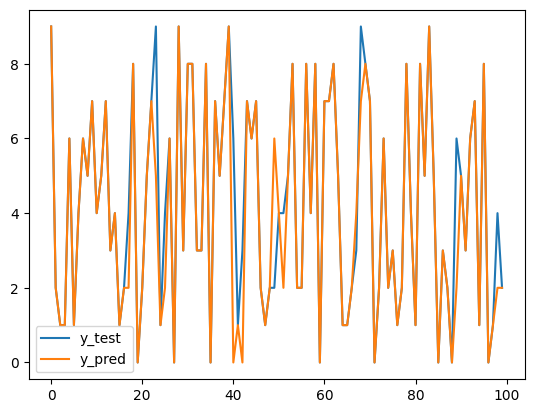

In [69]:
plt.plot(y_test[:100])
plt.plot(y_pred_label[:100])
plt.legend(['y_test', 'y_pred'])
plt.show()